In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import glob 
import os

In [2]:
folder_path = ('C:/Users/DELL/Desktop/udaanous/python/s&p/S&P_resources/individual_stocks_5yr')

In [3]:
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

In [4]:
dfs = [pd.read_csv(file) for file in csv_files]

In [5]:
combined_df = pd.concat(dfs, ignore_index=True)

In [6]:
combined_df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [7]:
print(f"Total number of DataFrames loaded: {len(dfs)}")


Total number of DataFrames loaded: 505


In [8]:
combined_df.shape

(619040, 7)

In [9]:
combined_df.columns


Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [10]:
combined_df['date'] = pd.to_datetime(combined_df['date'])
combined_df.sort_values(by=['Name','date'], inplace=True)


In [11]:
summary = combined_df.groupby('Name').agg(
    Start_Price=('close', lambda x: x.iloc[0]),
    End_Price=('close', lambda x: x.iloc[-1])
).reset_index()

summary['Change (%)'] = ((summary['End_Price'] - summary['Start_Price']) / summary['Start_Price']) * 100
summary['Change (%)'] = summary['Change (%)'].round(2)


In [12]:
print(summary.head())

 

   Name  Start_Price  End_Price  Change (%)
0     A      45.0800      68.06       50.98
1   AAL      14.7500      51.40      248.47
2   AAP      78.9000     109.93       39.33
3  AAPL      67.8542     159.54      135.12
4  ABBV      36.2500     113.62      213.43


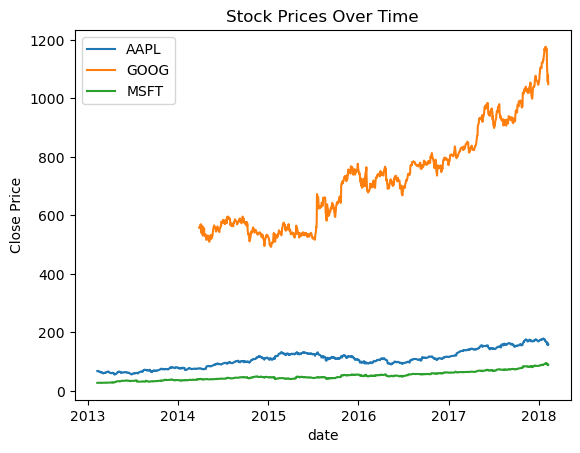

In [13]:
import matplotlib.pyplot as plt

sample_stocks = ['AAPL', 'GOOG', 'MSFT']  
for stock in sample_stocks:
    stock_df = combined_df[combined_df['Name'] == stock]
    plt.plot(stock_df['date'], stock_df['close'], label=stock)

plt.legend()
plt.xlabel('date')
plt.ylabel('Close Price')
plt.title('Stock Prices Over Time')
plt.show()


In [14]:
combined_df['ma_20'] = combined_df.groupby('Name')['close'].transform(lambda x: x.rolling(window=20).mean())
combined_df['ma_50'] = combined_df.groupby('Name')['close'].transform(lambda x: x.rolling(window=50).mean())
combined_df['ma_200'] = combined_df.groupby('Name')['close'].transform(lambda x: x.rolling(window=200).mean())


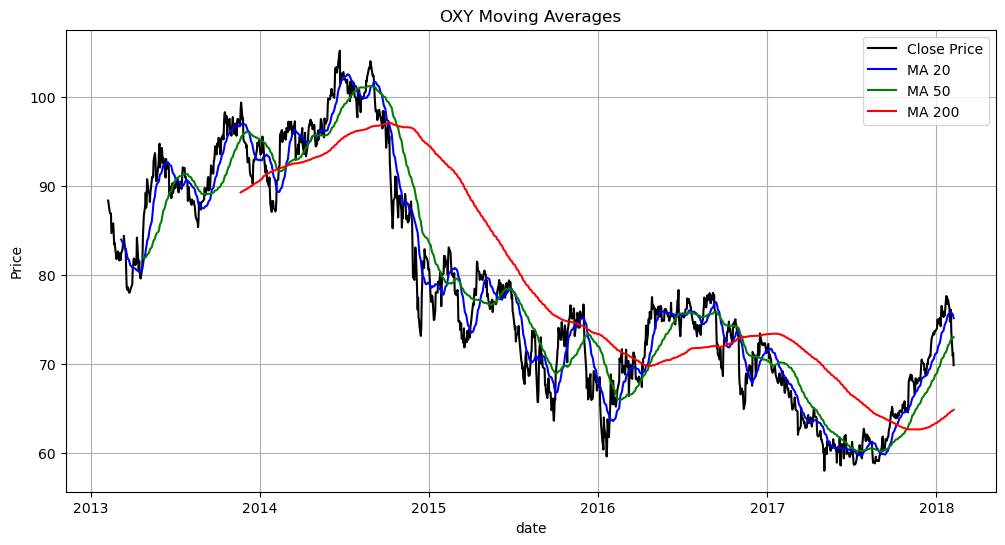

In [15]:
import matplotlib.pyplot as plt

stock_name = 'OXY'
df_stock = combined_df[combined_df['Name'] == 'OXY']

plt.figure(figsize=(12, 6))
plt.plot(df_stock['date'], df_stock['close'], label='Close Price', color='black')
plt.plot(df_stock['date'], df_stock['ma_20'], label='MA 20', color='blue')
plt.plot(df_stock['date'], df_stock['ma_50'], label='MA 50', color='green')
plt.plot(df_stock['date'], df_stock['ma_200'], label='MA 200', color='red')

plt.title(f"{'OXY'} Moving Averages")
plt.xlabel("date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


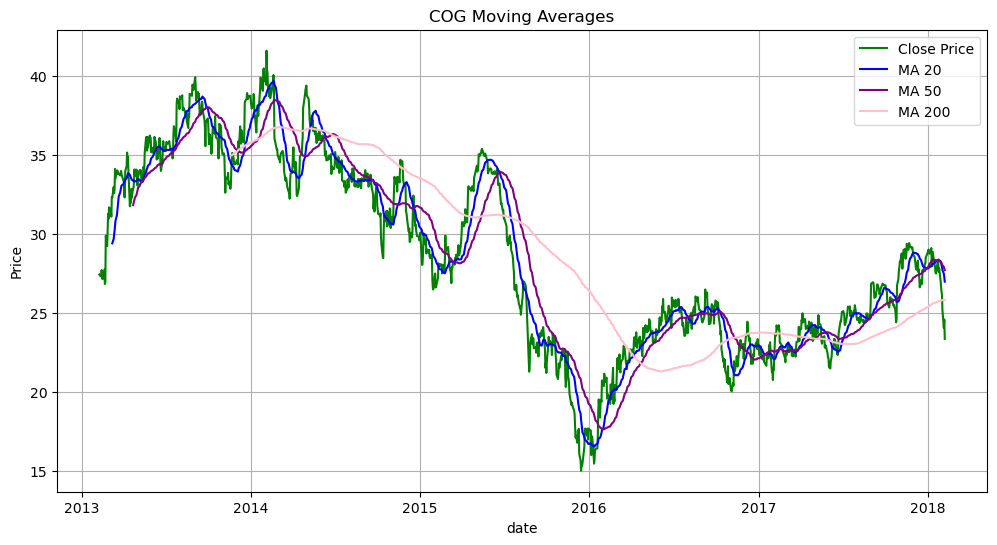

In [16]:
stock_name = 'COG'
df_stock = combined_df[combined_df['Name'] == 'COG']

plt.figure(figsize=(12, 6))
plt.plot(df_stock['date'], df_stock['close'], label='Close Price', color='green')
plt.plot(df_stock['date'], df_stock['ma_20'], label='MA 20', color='blue')
plt.plot(df_stock['date'], df_stock['ma_50'], label='MA 50', color='PURPLE')
plt.plot(df_stock['date'], df_stock['ma_200'], label='MA 200', color='PINK')

plt.title(f"{'COG'} Moving Averages")
plt.xlabel("date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


In [17]:
aapl_df = combined_df[combined_df['Name'] == 'AAPL'].copy()


In [18]:
aapl_df = aapl_df.sort_values('date').reset_index(drop=True)


In [19]:
aapl_df['close_pct_change'] = aapl_df['close'].pct_change() * 100


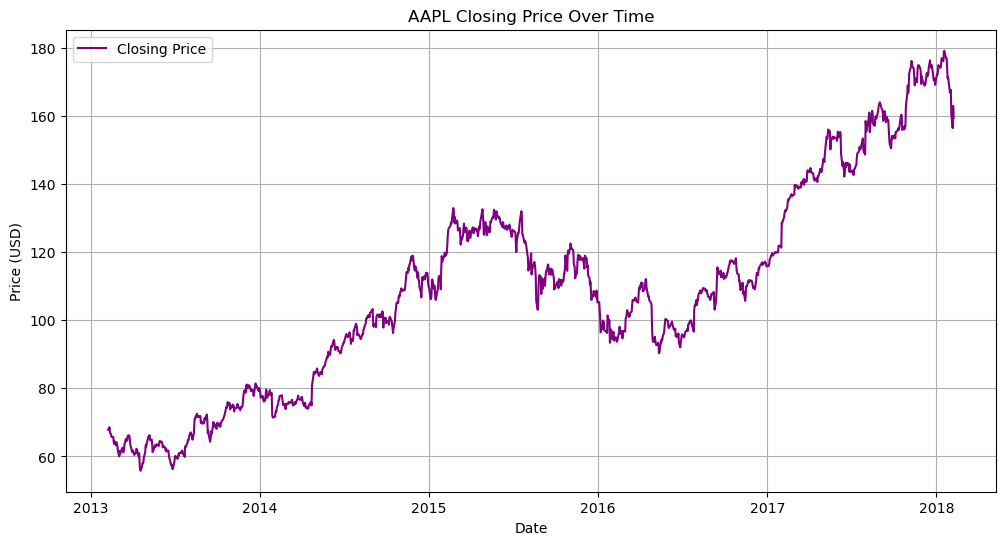

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(aapl_df['date'], aapl_df['close'], label='Closing Price', color='purple')
plt.title('AAPL Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


# 1. Resampling Analysis
## Resampling is commonly used with time series data to change the frequency of the data (e.g., daily to monthly).

In [51]:
df = pd.read_csv('AAPL_data.csv')

# Ensure 'Date' is in datetime format and set it as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Filter only numeric columns (critical step!)
df_numeric = df.select_dtypes(include='number')

# 1. Downsample: from daily to monthly, taking the mean
monthly_mean = df_numeric.resample('M').mean()

# 2. Upsample: from monthly to daily, forward filling the values
daily_upsampled = monthly_mean.resample('D').ffill()

# 3. Bootstrap Resampling to estimate mean distribution
bootstrap_means = [df_numeric.sample(frac=1, replace=True).mean() for _ in range(1000)]

# Show result
print("Monthly Mean (first 5 rows):")
print(monthly_mean.head())


Monthly Mean (first 5 rows):
                 open       high        low      close        volume
date                                                                
2013-02-28  65.660957  66.221671  64.803536  65.306264  1.151152e+08
2013-03-31  63.144435  63.829005  62.476795  63.120110  1.144458e+08
2013-04-30  59.966595  60.793227  59.246027  59.966432  1.242467e+08
2013-05-31  63.771505  64.522527  63.070718  63.778927  1.072722e+08
2013-06-30  61.137360  61.610010  60.293235  60.791120  8.769157e+07


In [52]:
monthly_stats = numeric_df.resample('M').agg(['mean', 'max'])
print(monthly_stats.head())

                 open                high                 low           \
                 mean      max       mean      max       mean      max   
date                                                                     
2013-02-28  65.660957  68.5014  66.221671  69.2771  64.803536  67.6071   
2013-03-31  63.144435  66.4914  63.829005  67.1356  62.476795  65.9685   
2013-04-30  59.966595  63.1285  60.793227  63.6071  59.246027  61.7242   
2013-05-31  63.771505  66.4242  64.522527  66.5356  63.070718  65.1156   
2013-06-30  61.137360  64.7456  61.610010  64.9185  60.293235  63.9128   

                close                 volume             
                 mean      max          mean        max  
date                                                     
2013-02-28  65.306264  68.5614  1.151152e+08  158168416  
2013-03-31  63.120110  66.2256  1.144458e+08  160710606  
2013-04-30  59.966432  63.2542  1.242467e+08  242387530  
2013-05-31  63.778927  66.2628  1.072722e+08  185278968  
2

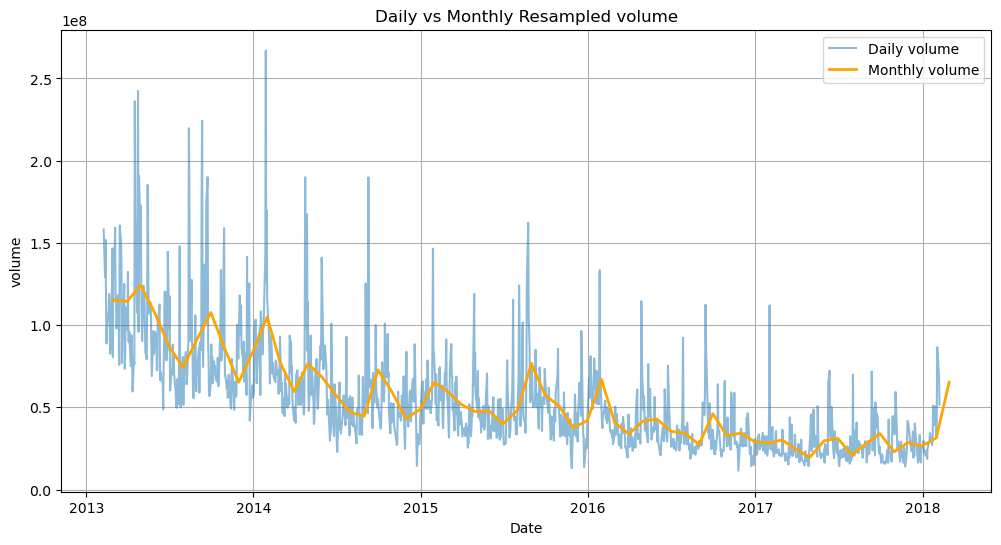

In [53]:
# Original daily data
plt.figure(figsize=(12, 6))
plt.plot(df['volume'], label='Daily volume', alpha=0.5)

# Resampled monthly mean
monthly = df['volume'].resample('M').mean()
plt.plot(monthly, label='Monthly volume', linewidth=2, color='orange')

plt.title("Daily vs Monthly Resampled volume")
plt.xlabel("Date")
plt.ylabel("volume")
plt.legend()
plt.grid(True)
plt.show()

#  2. Multivariate Analysis
## This is the examination of more than two variables to understand relationships and patterns.

In [56]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2013-02-08 to 2018-02-07
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1259 non-null   float64
 1   high    1259 non-null   float64
 2   low     1259 non-null   float64
 3   close   1259 non-null   float64
 4   volume  1259 non-null   int64  
 5   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 68.9+ KB
None
              open         high          low        close        volume
count  1259.000000  1259.000000  1259.000000  1259.000000  1.259000e+03
mean    109.055429   109.951118   108.141589   109.066698  5.404790e+07
std      30.549220    30.686186    30.376224    30.556812  3.346835e+07
min      55.424200    57.085700    55.014200    55.789900  1.147592e+07
25%      84.647800    85.334950    84.250650    84.830650  2.969438e+07
50%     108.970000   110.030000   108.050000   109.010000  4.566893e+07
75%     

In [57]:
print(df.isnull().sum())

open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64


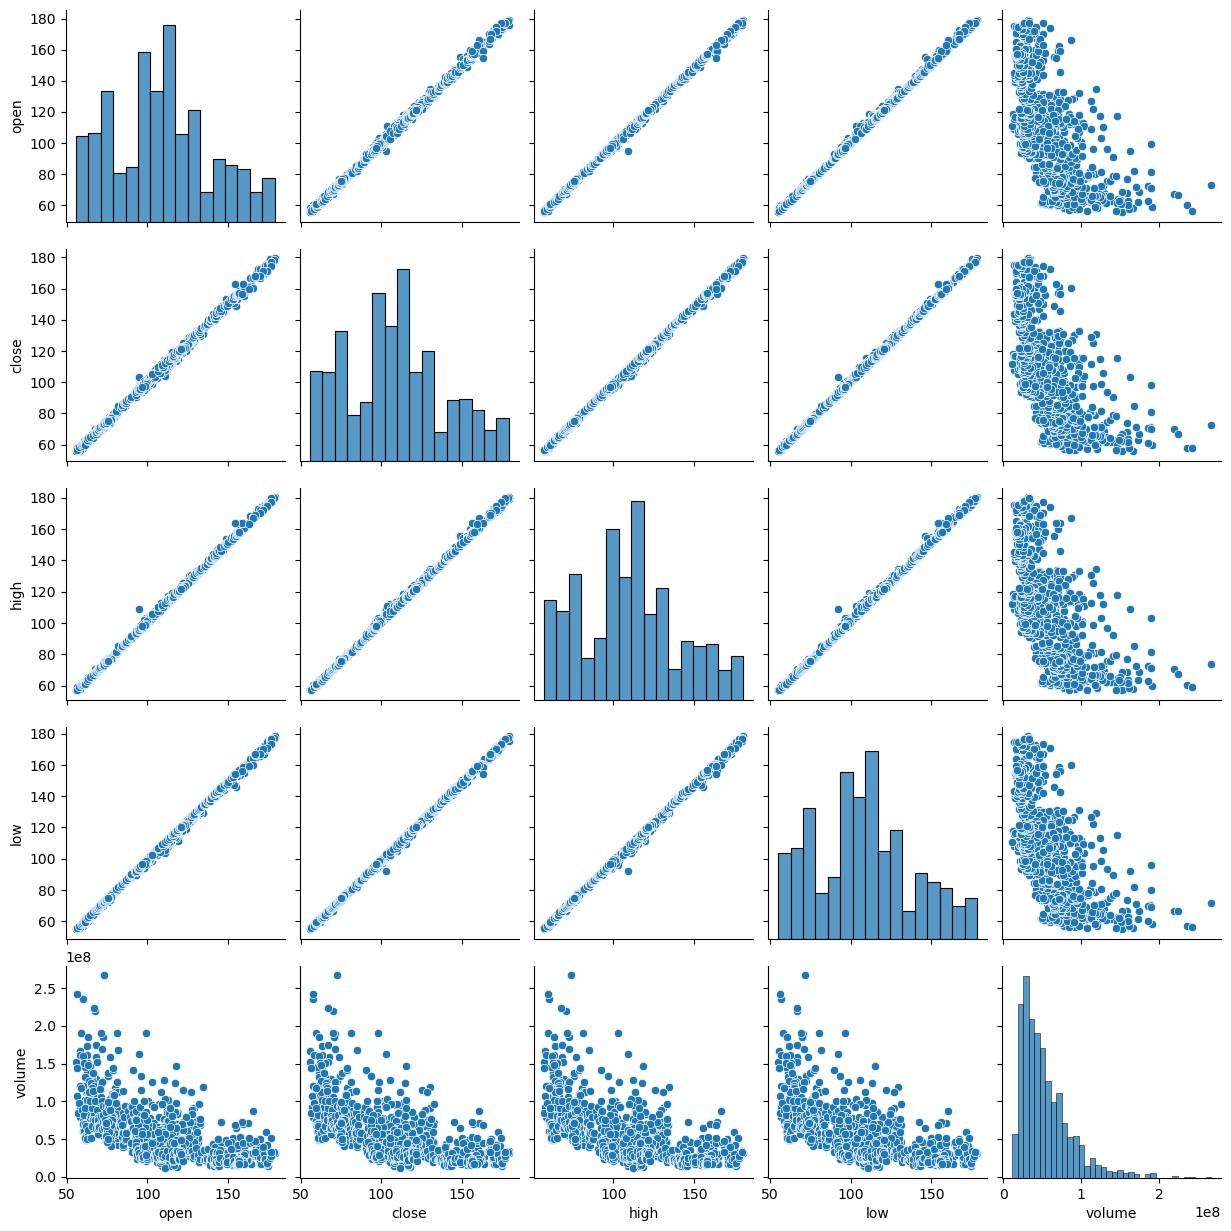

In [55]:
# Visualize pairwise relationships
sns.pairplot(df[['open', 'close', 'high', 'low', 'volume']])
plt.show()

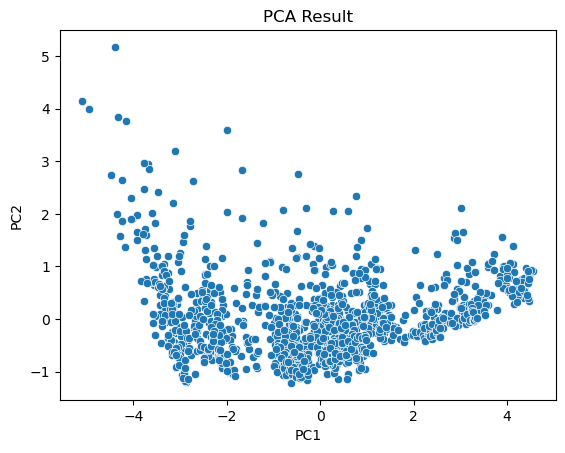

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select numeric columns
numeric_data = df.select_dtypes(include=['float64', 'int64'])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame of PCA results
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Plot
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('PCA Result')
plt.show()

In [62]:
import statsmodels.api as sm

# Example: Predict 'Close' using other numeric features
X = numeric_data.drop(columns=['volume'])
y = numeric_data['volume']

# Add constant for intercept
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 volume   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     350.2
Date:                Wed, 16 Apr 2025   Prob (F-statistic):          2.01e-202
Time:                        11:58:54   Log-Likelihood:                -23127.
No. Observations:                1259   AIC:                         4.626e+04
Df Residuals:                    1254   BIC:                         4.629e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.198e+08   2.45e+06     48.883      0.0

In [63]:
import statsmodels.api as sm

# Example: Predict Close using Open, High, Low
X = df[['open', 'high', 'low']]
y = df['close']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.406e+06
Date:                Wed, 16 Apr 2025   Prob (F-statistic):               0.00
Time:                        11:58:54   Log-Likelihood:                -979.39
No. Observations:                1259   AIC:                             1967.
Df Residuals:                    1255   BIC:                             1987.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0868      0.056     -1.548      0.1

# 3. Correlation Analysis
## This shows how strongly pairs of variables are related.

            open      high       low     close    volume
open    1.000000  0.999584  0.999515  0.999118 -0.617862
high    0.999584  1.000000  0.999382  0.999584 -0.612622
low     0.999515  0.999382  1.000000  0.999614 -0.625910
close   0.999118  0.999584  0.999614  1.000000 -0.620290
volume -0.617862 -0.612622 -0.625910 -0.620290  1.000000


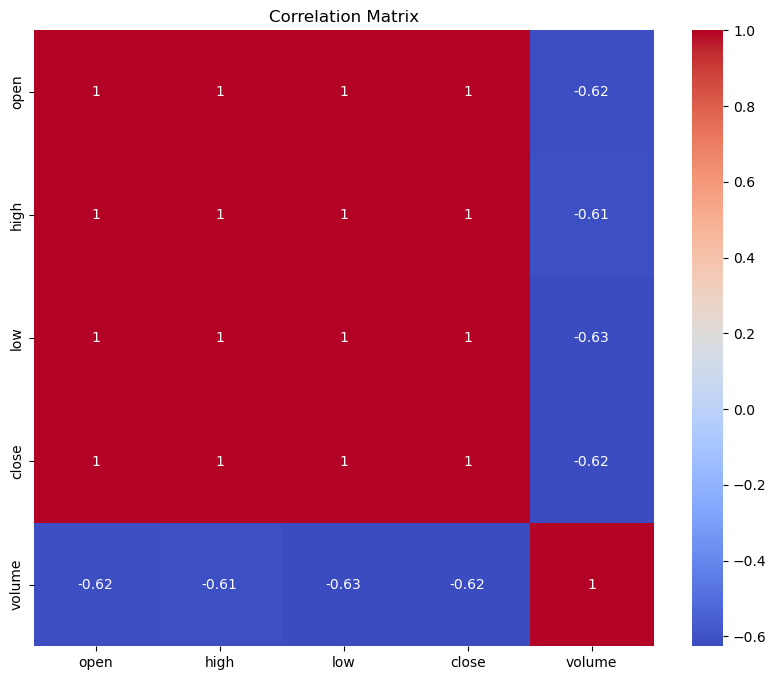

In [66]:
# Correlation
correlation_matrix = df_numeric.corr()
print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()